In [3]:
using DataFrames
benchmark_data = [288550.0 8550.0 2.304125481670543e7]
proposed_data = [249000.0 9500.0 2.343582408686872e7]
res = zeros(2, 4)
res[1:2,1:3] .= vcat(benchmark_data, proposed_data)
res[1:2,4] .= [sum(res[1,1:3]), sum(res[2,1:3])]
sol = DataFrame(res, [:"shutup-cost", :"shutdown-cost", :"fuel-cost", :"sum-cost"])


,shutup-cost,shutdown-cost,fuel-cost,sum-cost
,Float64,Float64,Float64,Float64
1,288550.0,8550.0,2.30413e7,2.33384e7
2,249000.0,9500.0,2.34358e7,2.36943e7


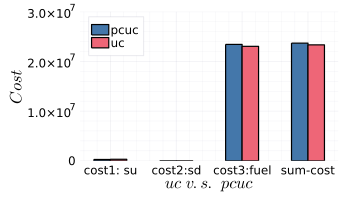

In [4]:
using StatsPlots, LaTeXStrings, Plots, PlotThemes
Plots.theme(:bright)
# theme(thm::Symbol; kwargs...)

ctg = repeat(["uc", "pcuc"], inner=4)
nam = repeat(["cost1: su", "cost2:sd", "cost3:fuel", "sum-cost"], outer=2)
groupedbar(nam, res[1:2, 1:4]', group=ctg, size=(350, 200), bar_width=0.5, ylabel=L"Cost", xlabel=L"uc\,\, v.s. \,\, pcuc", ylims=(0, 3.0e7), legend=:topleft)

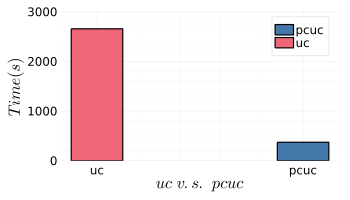

In [5]:
cal = [2657.84, 371.95]
ctg = repeat(["uc", "pcuc"], inner=1)
# nam = repeat(["time"], outer=1)
Plots.bar(cal, group=ctg, ylabel=L"Time (s)", xlabel=L"uc\,\, v.s. \,\, pcuc", size=(350, 200), bar_width=0.25, xticks=(collect(1:1:2), ["uc" "pcuc"]), ylims=(0, 3.0e3), legend=:topright)

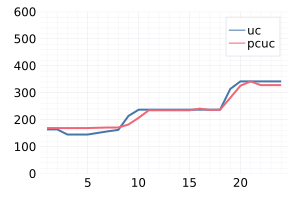

In [6]:
include("/home/yuanyiping/下载/task 9/master-5/tem/unitsol.jl")
bench, pro, statisticnumber = definesolutions()
# f1 = Plots.heatmap(bench, c=cgrad([:White, :Crimson]))
# f2 = Plots.heatmap(pro, c=cgrad([:White, :DarkBlue]))
# Plots.plot(f1, f2, layout=(1, 2))
f31 = Plots.plot(statisticnumber[:, 1], label="uc", lw = 2, size=(300, 200), ylims=(0, 600))
f31 = Plots.plot!(statisticnumber[:, 2], label="pcuc", lw = 2, )

In [7]:
using JLD2
frequency_critical_scenario1, rampingup_critical_scenario1 = JLD2.load("/home/yuanyiping/下载/task 9/master-5/res/scenarios/scenaros1.jld2")
frequency_critical_scenario5, rampingup_critical_scenario5 = JLD2.load("/home/yuanyiping/下载/task 9/master-5/res/scenarios/scenaros5.jld2")
frequency_critical_scenario30, rampingup_critical_scenario30 = JLD2.load("/home/yuanyiping/下载/task 9/master-5/res/scenarios/scenaros30.jld2")

Dict{String, Any} with 2 entries:
  "frequency_critical_scenario" => [0.0 1.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0…
  "rampingup_critical_scenario" => [0.0 0.0 … 0.0 1.0; 0.0 0.0 … 0.0 0.0; … ; 0…

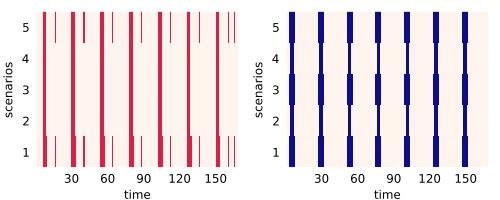

In [8]:
p11 = Plots.heatmap(rampingup_critical_scenario5[2], c=cgrad([:Seashell, :Crimson]), ylabel="scenarios", xlabel="time")
p21 = Plots.heatmap(frequency_critical_scenario5[2], c=cgrad([:Seashell, :DarkBlue]), ylabel="scenarios", xlabel="time")
p1 = Plots.plot(p11, p21; size=(500, 200), titlefontsize=8, xlabelfontsize=8, ylabelfontsize=8, yticksfontsize=5, xticksfontsize=5, layout=(1, 2), fillalpha = 0.95, colorbar=:none)

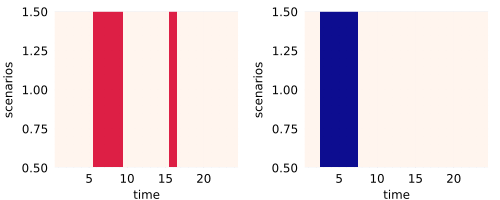

In [9]:
day_rampingup_critical_scenario = reshape(rampingup_critical_scenario5[2][1, 1:24], 1, 24)
day_frequency_critical_scenario = reshape(frequency_critical_scenario5[2][1, 1:24], 1, 24)
p12 = Plots.heatmap(day_rampingup_critical_scenario, c=cgrad([:Seashell, :Crimson]), ylabel="scenarios", xlabel="time")
p22 = Plots.heatmap(day_frequency_critical_scenario, c=cgrad([:Seashell, :DarkBlue]), ylabel="scenarios", xlabel="time")
p2 = Plots.plot(p12, p22; size=(500, 200), titlefontsize=8, xlabelfontsize=8, ylabelfontsize=8, yticksfontsize=5, xticksfontsize=5, layout=(1, 2), fillalpha=0.95, colorbar=:none)

#### comparsion without/with frequency dynamic/flexible dynamics

In [10]:
pros_withFlexandFreq = [283400.0 0.0 2.4401220349136755e7]
pros_withoutFlexandFreq = [269500.0 7500.0 2.3452328851674266e7]
# pro1:rocof = 0.85; pro2:rocof = 1.00; pro0:rocof = none
pro1, pro2, pro0, statisticnumber = calculate_FREQandFLEX()
res = zeros(2, 5)
res[1:2, 1:3] .= vcat(pros_withFlexandFreq, pros_withoutFlexandFreq)
res[1:2, 4] .= [sum(res[1, 1:3]), sum(res[2, 1:3])]
res[1:2, 5] .= [2888.32, 455.109172]
sol = DataFrame(res, [:"shutup-cost", :"shutdown-cost", :"fuel-cost", :"sum-cost", :"CPU time"])

,shutup-cost,shutdown-cost,fuel-cost,sum-cost,CPU time
,Float64,Float64,Float64,Float64,Float64
1,283400.0,0.0,2.44012e7,2.46846e7,2888.32
2,269500.0,7500.0,2.34523e7,2.37293e7,455.109


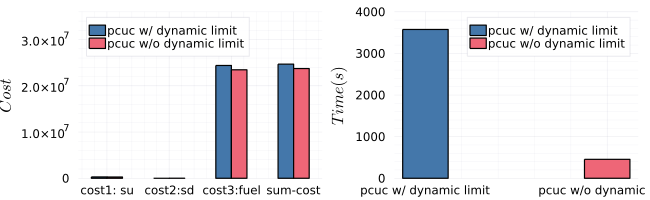

In [11]:
ctg = repeat(["pcuc w/ dynamic limit", "pcuc w/o dynamic limit"], inner=4)
nam = repeat(["cost1: su", "cost2:sd", "cost3:fuel", "sum-cost"], outer=2)
f1 = groupedbar(nam, res[1:2, 1:4]', group=ctg, size=(350, 200), bar_width=0.5, ylabel=L"Cost", ylims=(0, 3.6e7), legend=:topleft)
cal = [3576.1932, 455.109172]
ctg = repeat(["pcuc w/ dynamic limit", "pcuc w/o dynamic limit"], inner=1)
# nam = repeat(["time"], outer=1)
f2 = Plots.bar(cal, group=ctg, ylabel=L"Time (s)", size=(350, 200), bar_width=0.25, xticks=(collect(1:1:2), ["pcuc w/ dynamic limit" "pcuc w/o dynamic limit"]), ylims=(0, 4000), legend=:topright)
Plots.plot(f1, f2, size = (650, 200), layout=(1, 2))

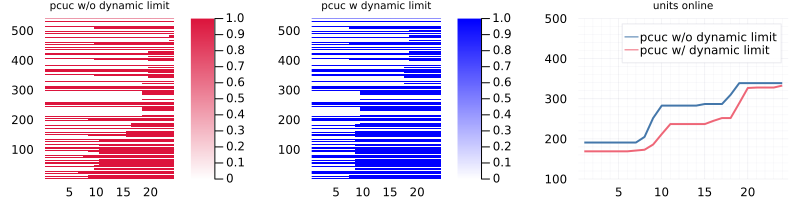

In [14]:
# pro1, pro2, statisticnumber = calculate_FREQandFLEX()
p1 = Plots.heatmap(pro0, c=cgrad([:White, :Crimson]), title="pcuc w/o dynamic limit")
p2 = Plots.heatmap(pro2, c=cgrad([:White, :Blue]), title="pcuc w dynamic limit")
f3 = Plots.plot(collect(1:1:24), statisticnumber[:, 1], label="pcuc w/o dynamic limit", lw=2, size=(300, 200), ylims = (100, 500), title = "units online")
f3 = Plots.plot!(collect(1:1:24), statisticnumber[:, 2], label="pcuc w/ dynamic limit", lw=2,)
Plots.plot(p1, p2, f3, size=(800, 200), titlefontsize=7, layout=(1, 3))

Step-1: Pkgs and functions are loaded


Step-2: imput data are loaded


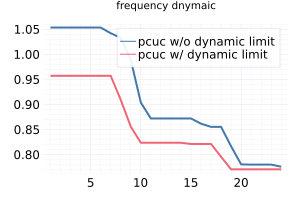

In [12]:
include("/home/yuanyiping/下载/task 9/master-5/src/formatteddata.jl")
include("/home/yuanyiping/下载/task 9/master-5/src/renewableenergysimulation.jl")
include("/home/yuanyiping/下载/task 9/master-5/src/readdatafromexcel.jl")
UnitsFreqParam, WindsFreqParam, StrogeData, DataGen, GenCost, DataBranch, LoadCurve, DataLoad = readxlssheet()
config_param, units, lines, loads, stroges, NB, NG, NL, ND, NT, NC = forminputdata(DataGen, DataBranch, DataLoad, LoadCurve, GenCost, UnitsFreqParam, StrogeData)
winds, NW = genscenario(WindsFreqParam, 2)
p_step = maximum(units.p_max) * 1
inertia_info = zeros(24, 2)
for t in 1:24
    nadir_distribution, t_nadir, Hg, δp, Kg, Fg, Rg, Dg, Tg, tem1 = creatingfrequencyresponsesamplingdata(units, winds, NW, NG, pro0[:, t], 1)
    inertia_info[t, 1] = p_step / (2 * Hg)
    nadir_distribution, t_nadir, Hg, δp, Kg, Fg, Rg, Dg, Tg, tem1 = creatingfrequencyresponsesamplingdata(units, winds, NW, NG, pro2[:, t], 1)
    inertia_info[t, 2] = p_step / (2 * Hg)
end
# xdata = collect(1:1:24)
f1 = Plots.plot(collect(1:1:24), inertia_info[:, 1], label="pcuc w/o dynamic limit", lw=2, size=(300, 200), title="frequency dnymaic", titlefontsize=7,)
f1 = Plots.plot!(collect(1:1:24), inertia_info[:, 2], label="pcuc w/ dynamic limit", lw=2,)

Step-1: Pkgs and functions are loaded
Step-2: imput data are loaded
[5, 1]
[3, 4]
[3, 1]
[3, 4]
[2, 6]


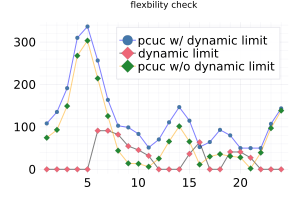

In [15]:
include("/home/yuanyiping/下载/task 9/master-5/tem/checkflexdistributioninfo.jl")
p1, p2 = checkflexinfo()
Plots.plot(p2, titlefontsize = 6)